<a href="https://colab.research.google.com/github/v2earts/Web1/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A7%9B%EB%B3%B4%EA%B8%B0_%EA%B5%90%EC%9C%A1_EDA_%EA%B5%90%EC%9E%AC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 의약품 처방정보 분석
* 빅데이터를 대상으로 원하는 데이터를 추출하는 방법
* 결측치 처리, 자료형 변환 등의 데이터 전처리
* 복합적인 정보를 가지고 있는 변수를 이용해 파생변수 만들기
* 코드로 표현된 변수를 알아보기 쉽게 문자열 형태로 변환하기
* 특정 의약품에 대해 시각화하고 상세 정보 조사하기

## 핵심 개념
* 데이터 샘플링
* 데이터 전처리
* 파생변수
* 데이터 시각화

## 의약품 처방정보
* https://www.data.go.kr/data/15007117/fileData.do

* 의약품처방정보는 국민건강보험 가입자 중 의약품처방이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 의약품처방전별 개별 의약품에 대한 처방내역(요양개시일자, 1회투약량, 1일투약량, 총투여일수 등)으로 구성된 개방데이터입니다.


* 약품일반성분명코드 : http://www.hira.or.kr/

* 주성분코드부여방법 : https://www.health.kr/drug_info/basedrug/main_ingredient.html

## 라이브러리 로드
### pandas
* 데이터분석 라이브러리입니다.
* https://pandas.pydata.org/

### numpy
* 수치계산 라이브러리입니다.
* https://numpy.org/

### matplotlib.pyplot
* matplotlib.pyplot은 기본적인 시각화를 지원하는 python 라이브러리입니다.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

### seaborn
* seaborn은 matplotlib에 기반하여 고수준 API와 통계 시각화 라이브러리입니다.
* https://seaborn.pydata.org/

In [ ]:
# pandas
# numpy
# matplotlib.pyplot
# seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 한글폰트 설정

In [ ]:
# 한글폰트 사용을 위해 설치
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.5 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

## 데이터 불러오기

In [ ]:
# df
# df = pd.read_csv(file_name)
df = pd.read_csv("./medicine.csv")
# "요양개시일자" 변수를 pandas의 datetime 자료형으로 만들기

<ipython-input-45-afbbfafab820>:3: DtypeWarning: Columns (1,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./medicine.csv")


In [ ]:
# 처음 n개의 행을 반환합니다.
# 지정하지 않으면 5개의 행을 반환합니다.
df.head()

,Unnamed: 0,성별,가입자 일련번호,처방내역 일련번호,일련번호,연령대코드(5세단위),요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총 투여일수,단가,금액
0,0,여자,628074.0,9261.0,1.0,13.0,2021-09-13,347701ACH,1.0,1.0,3.0,521.0,1563.0
1,1,여자,730013.0,13348.0,1.0,13.0,2021-02-17,493801ATB,1.0,1.0,3.0,534.0,1602.0
2,2,여자,97734.0,16827.0,1.0,13.0,2021-06-10,374602ATB,1.0,1.0,3.0,469.0,1407.0
3,3,여자,818851.0,20079.0,1.0,13.0,2021-09-15,367201ATB,1.0,1.0,3.0,764.0,2292.0
4,4,여자,835362.0,26258.0,1.0,13.0,2021-07-17,111501ATB,1.0,1.0,30.0,644.0,19320.0


In [ ]:
# 마지막 n개의 행을 반환합니다.
# 지정하지 않으면 5개의 행을 반환합니다.
df.tail()

,Unnamed: 0,성별,가입자 일련번호,처방내역 일련번호,일련번호,연령대코드(5세단위),요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총 투여일수,단가,금액
323226,323226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323227,323227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323228,323228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323229,323229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323230,323230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# DataFrame의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323231 entries, 0 to 323230
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   323231 non-null  int64  
 1   성별           99999 non-null   object 
 2   가입자 일련번호     99999 non-null   float64
 3   처방내역 일련번호    99999 non-null   float64
 4   일련번호         99999 non-null   float64
 5   연령대코드(5세단위)  99999 non-null   float64
 6   요양개시일자       99999 non-null   object 
 7   약품일반성분명코드    99999 non-null   object 
 8   1회 투약량       99999 non-null   float64
 9   1일 투약량       99999 non-null   float64
 10  총 투여일수       99999 non-null   float64
 11  단가           99999 non-null   float64
 12  금액           99999 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 32.1+ MB


In [ ]:
# 지정된 DataFrame의 유일값의 빈도수를 계산합니다.
df.nunique()

Unnamed: 0     323231
성별                  2
가입자 일련번호        54029
처방내역 일련번호       99999
일련번호                1
연령대코드(5세단위)        18
요양개시일자            365
약품일반성분명코드        1301
1회 투약량              1
1일 투약량              1
총 투여일수            164
단가               1369
금액               4887
dtype: int64

## 데이터 전처리
* 데이터 전처리란 데이터에 적절한 작업을 함으로써 활용하기 좋은 형태로 만드는 것입니다.
* 결측치를 탐색하고 처리하는 것, 적절하지 못한 자료형을 바꾸는 것이 전처리에 포함됩니다.

In [ ]:
# 결측치의 합을 출력합니다.
# 결측치의 합을 출력하면 결측치가 몇 개 있는지 확인할 수 있습니다.
df.isnull().sum()

Unnamed: 0          0
성별             223232
가입자 일련번호       223232
처방내역 일련번호      223232
일련번호           223232
연령대코드(5세단위)    223232
요양개시일자         223232
약품일반성분명코드      223232
1회 투약량         223232
1일 투약량         223232
총 투여일수         223232
단가             223232
금액             223232
dtype: int64

### 결측치 처리
* "약품일반성분명코드" 결측치 확인
* 결측치를 처리하는 방법은 여러 가지가 있습니다.
* 결측치를 포함한 행을 버리거나, 최빈값이나 평균값으로 보간하는 방법 등이 있습니다.
* 이번에는 결측치를 포함한 행을 버리겠습니다.

In [ ]:
# 결측치가 포함된 행은 삭제하겠습니다.
# 결과를 확인합니다.
df = df.dropna()
df.isnull().sum()

Unnamed: 0     0
성별             0
가입자 일련번호       0
처방내역 일련번호      0
일련번호           0
연령대코드(5세단위)    0
요양개시일자         0
약품일반성분명코드      0
1회 투약량         0
1일 투약량         0
총 투여일수         0
단가             0
금액             0
dtype: int64

In [ ]:
# 불필요한 칼럼 제거
df.drop(columns = ["Unnamed: 0"],inplace=True)

In [ ]:
df

,성별,가입자 일련번호,처방내역 일련번호,일련번호,연령대코드(5세단위),요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총 투여일수,단가,금액
0,여자,628074.0,9261.0,1.0,13.0,2021-09-13,347701ACH,1.0,1.0,3.0,521.0,1563.0
1,여자,730013.0,13348.0,1.0,13.0,2021-02-17,493801ATB,1.0,1.0,3.0,534.0,1602.0
2,여자,97734.0,16827.0,1.0,13.0,2021-06-10,374602ATB,1.0,1.0,3.0,469.0,1407.0
3,여자,818851.0,20079.0,1.0,13.0,2021-09-15,367201ATB,1.0,1.0,3.0,764.0,2292.0
4,여자,835362.0,26258.0,1.0,13.0,2021-07-17,111501ATB,1.0,1.0,30.0,644.0,19320.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,여자,614174.0,2564888.0,1.0,17.0,2021-08-12,454003ATB,1.0,1.0,30.0,339.0,10170.0
99995,남자,514375.0,2565521.0,1.0,12.0,2021-03-02,361331CSI,1.0,1.0,1.0,10692.0,10692.0
99996,남자,489643.0,2577554.0,1.0,15.0,2021-03-08,107601ATB,1.0,1.0,90.0,363.0,32670.0
99997,여자,839893.0,2584953.0,1.0,9.0,2021-02-03,361331CSI,1.0,1.0,1.0,10692.0,10692.0


# ***데이터 필터링***

### 파생변수 만들기 - 월, 일, 요일
* 변수를 나누거나 합치거나 다른 형태로 바꿔서 분석하면 더 편리한 경우가 있습니다.
* 원래 있던 변수에서 새로 생겨난 변수를 파생변수라고 합니다.
* "요양개시일자" 변수를 다양하게 분석할 수 있도록 나누겠습니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           99999 non-null  object 
 1   가입자 일련번호     99999 non-null  float64
 2   처방내역 일련번호    99999 non-null  float64
 3   일련번호         99999 non-null  float64
 4   연령대코드(5세단위)  99999 non-null  float64
 5   요양개시일자       99999 non-null  object 
 6   약품일반성분명코드    99999 non-null  object 
 7   1회 투약량       99999 non-null  float64
 8   1일 투약량       99999 non-null  float64
 9   총 투여일수       99999 non-null  float64
 10  단가           99999 non-null  float64
 11  금액           99999 non-null  float64
dtypes: float64(9), object(3)
memory usage: 9.9+ MB


In [ ]:
df['요양개시일자']=pd.to_datetime(df['요양개시일자'])

In [ ]:
# 연월일 데이터는 여러 변수로 나뉠 수 있습니다.
# 월, 일, 요일 코드, 영문 요일로 변수를 나누겠습니다.
# "요양개시일자" 변수에서 월을 새로운 변수로 만듭니다.
# "요양개시일자" 변수에서 일을 새로운 변수로 만듭니다.
# "요양개시일자" 변수에서 요일을 새로운 변수로 만듭니다.
# 요일은 0~6의 숫자가 월~일에 대응되는 형태로 변환됩니다.
# "요양개시일자" 변수에서 영문 요일을 새로운 변수로 만듭니다.
df['월']=df['요양개시일자'].dt.month
df['일']=df['요양개시일자'].dt.day
df['요일']=df['요양개시일자'].dt.dayofweek
df['영문요일']=df['요양개시일자'].dt.day_name()

In [ ]:
# head()
df.head()

,성별,가입자 일련번호,처방내역 일련번호,일련번호,연령대코드(5세단위),요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총 투여일수,단가,금액,월,일,요일,영문요일
0,여자,628074.0,9261.0,1.0,13.0,2021-09-13,347701ACH,1.0,1.0,3.0,521.0,1563.0,9,13,0,Monday
1,여자,730013.0,13348.0,1.0,13.0,2021-02-17,493801ATB,1.0,1.0,3.0,534.0,1602.0,2,17,2,Wednesday
2,여자,97734.0,16827.0,1.0,13.0,2021-06-10,374602ATB,1.0,1.0,3.0,469.0,1407.0,6,10,3,Thursday
3,여자,818851.0,20079.0,1.0,13.0,2021-09-15,367201ATB,1.0,1.0,3.0,764.0,2292.0,9,15,2,Wednesday
4,여자,835362.0,26258.0,1.0,13.0,2021-07-17,111501ATB,1.0,1.0,30.0,644.0,19320.0,7,17,5,Saturday


### map 메소드
* map 메서드를 이용하면 DataFrame의 여러 값을 편리하게 변환할 수 있습니다.
* 여기서 map 메서드란 pandas의 pandas.Series.map을 의미합니다.
* 입력 대응에 따라 Series의 값을 매핑합니다.
* 매핑은 일정한 규칙에 따라 반복 가능한 객체를 변환시키는 것으로 이해하면 됩니다.
    * 반복 가능한 객체란 내부적으로 요소를 여러 개 가지고 있어 값을 차례대로 꺼낼 수 있는 객체입니다.
* dictionary 등을 인자로 받을 수 있습니다.

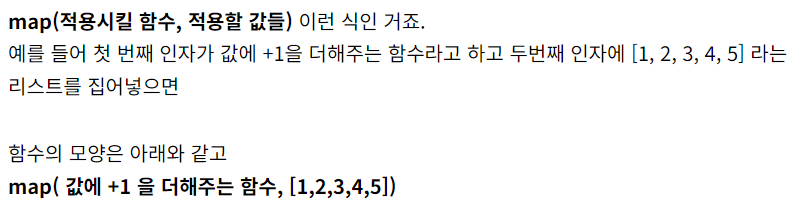

### 파생변수 만들기 - 연령대
* "연령대코드(5세단위)" 변수는 코드값으로 되어 있어 어느 연령대인지 알기 어렵습니다.
* 각 코드에 해당하는 연령대를 갖는 변수를 새로 선언하겠습니다.

In [ ]:
# '연령대코드(5세단위)' 를 연령대로 나타낸 정보입니다.
age_code = """1 00~04세
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
10 45~49세
11 50~54세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""
age_code

'1 00~04세\n2 05~09세\n3 10~14세\n4 15~19세\n5 20~24세\n6 25~29세\n7 30~34세\n8 35~39세\n9 40~44세\n10 45~49세\n11 50~54세\n12 55~59세\n13 60~64세\n14 65~69세\n15 70~74세\n16 75~79세\n17 80~84세\n18 85세+'

In [ ]:
# 연령대코드 정보를 python의 dictionary 형태로 변환하겠습니다.
# age_code를 개행문자를 기준으로 나눈 리스트로 바꿉니다.
# 새로운 dict를 선언합니다.

# for 문을 이용해 리스트 안의 내용을 하나씩 다룹니다.
# 연령대코드와 연령대가 띄어쓰기를 기준으로 구분되어 있습니다.
# 띄어쓰기를 기준으로 분할하고 앞 단어는 key, 뒤 단어는 value가 되도록 dict에 삽입합니다.
# 최종 dict를 확인합니다.
age_list = age_code.split("\n")
age_dict = {}

for age  in age_list:
  key=int(age.split()[0])
  val=age.split()[1]
  age_dict[key] = val

age_dict


{1: '00~04세',
 2: '05~09세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [ ]:
# map 메서드를 이용해 연령대코드에 해당하는 연령대 정보를 갖는 변수를 만듭니다.
# df["연령대"]
df["연령대"] = df["연령대코드(5세단위)"].map(age_dict)
df[["연령대코드(5세단위)", "연령대"]].sample(5)

,연령대코드(5세단위),연령대
87358,14.0,65~69세
88559,15.0,70~74세
68103,11.0,50~54세
95408,14.0,65~69세
23967,13.0,60~64세


* value_counts :  열의 각 고윳값에 대한 개수를 반환
* sort_index : index를 기준으로 정렬
* 즉, 연령대별로 개수를 세고, 나이가 어린 순서대로 정렬을 해준다
  

<Axes: >

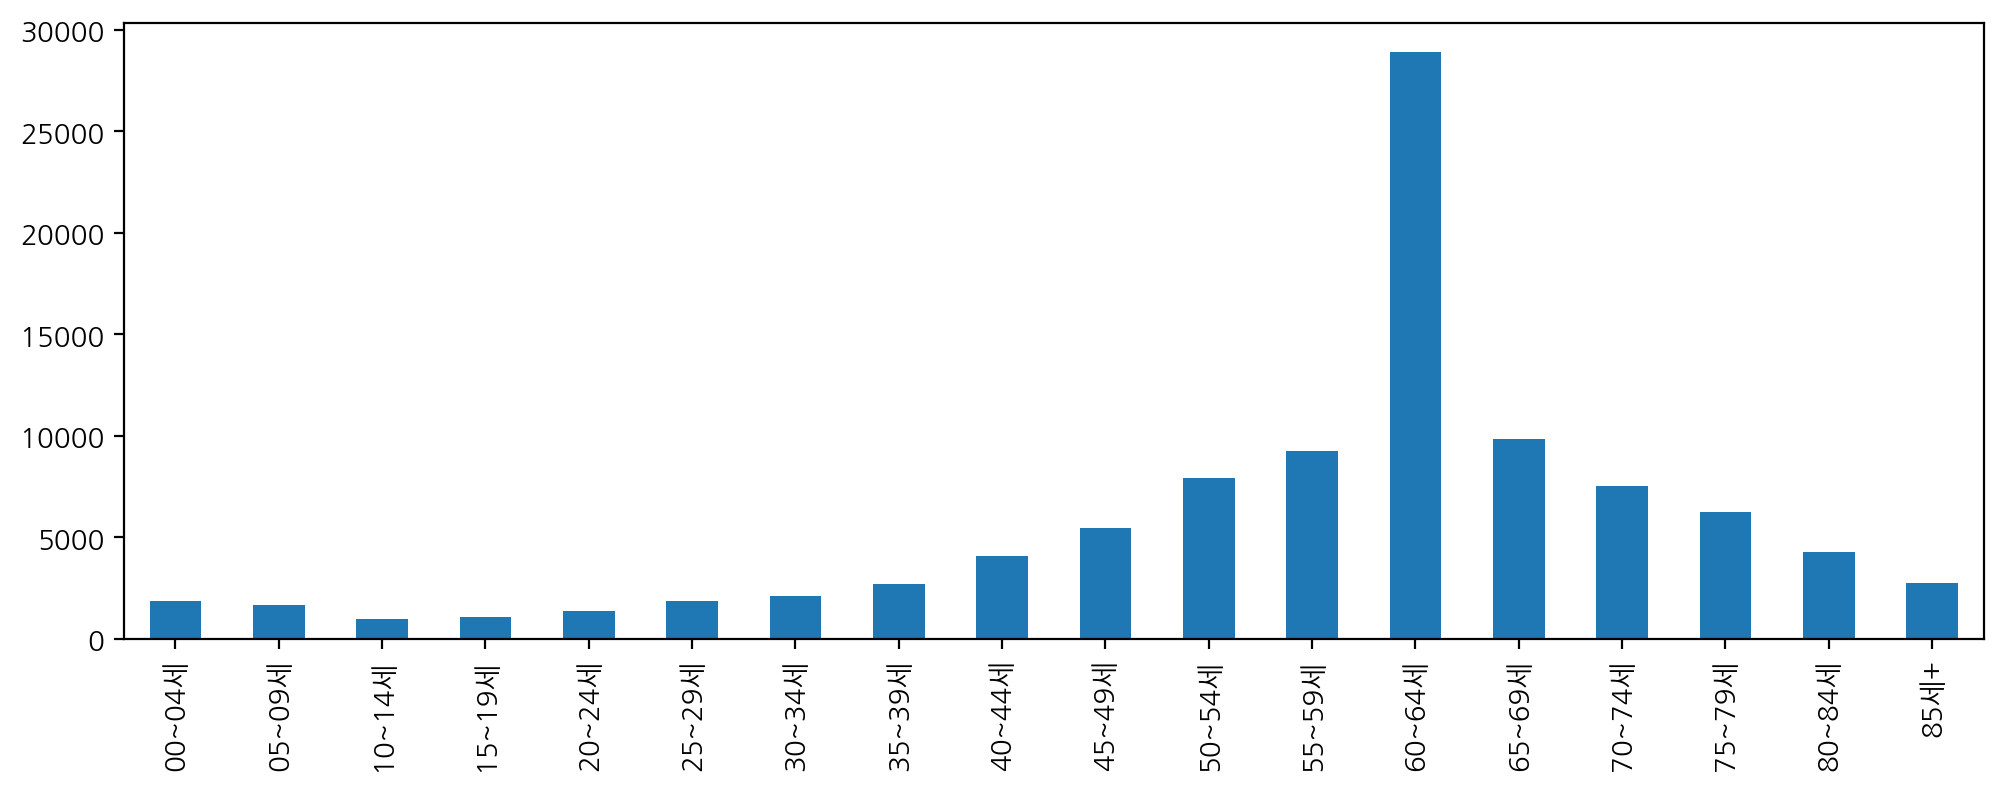

In [ ]:
df["연령대"].value_counts().sort_index().plot.bar(figsize=(12, 4))

#### crosstab으로 연령별 성별 수 확인하기

* crosstab() : 범주형 데이터 2개를 비교하는 교차분석표

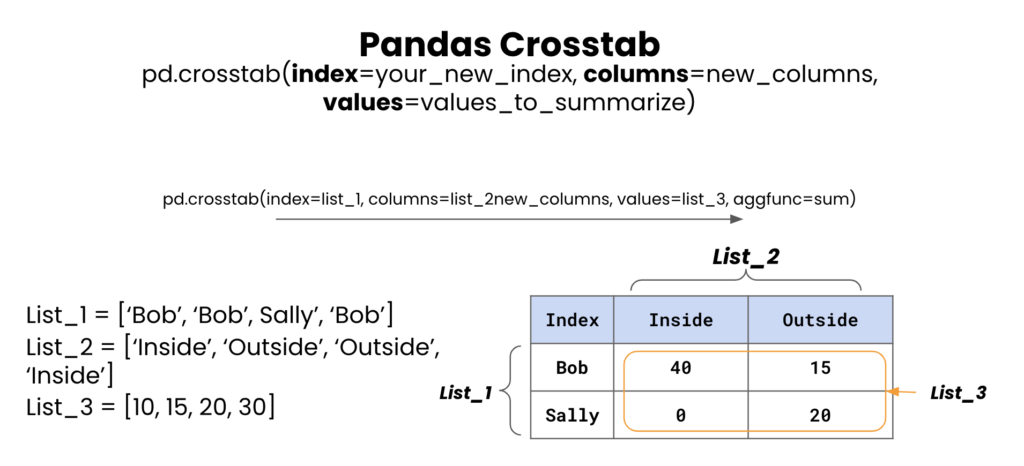

In [ ]:
df["성별"].value_counts()

여자    53932
남자    46067
Name: 성별, dtype: int64

In [ ]:
gender_age = pd.crosstab(df["성별"],df["연령대"])
gender_age


연령대,00~04세,05~09세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세+
성별,,,,,,,,,,,,,,,,,,
남자,1019,907,531,472,535,786,842,1227,2058,2769,3887,4350,13867,4376,3263,2593,1639,946
여자,873,745,464,594,837,1102,1268,1476,2023,2716,4037,4912,15021,5480,4263,3663,2646,1812


### 파생변수 만들기 - 투여경로, 제형
* "약품일반성분명코드" 변수는 여러 정보를 복합적으로 담고 있는 변수입니다.
* 관련 정보는 아래 링크를 확인해주세요.
* https://www.health.kr/drug_info/basedrug/main_ingredient.html
* 이 중에서 투여 경로와 약의 제형을 새로운 변수로 선언하겠습니다.
* pandas에서의 텍스트 데이터 다루기 : https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [ ]:
# DataFrame에서 문자열 정보에 접근하고 싶을 때 .str을 이용합니다.
# 문자열 중에서 일부 정보만 원할 경우 문자열 슬라이싱을 이용해서 일부만 가져올 수 있습니다.
# "약품일반성분명코드"에서 투여경로에 해당하는 정보만 가져와 "투여경로" 변수로 선언하겠습니다.
# "약품일반성분명코드"에서 제형에 해당하는 정보만 가져와 "제형" 변수로 선언하겠습니다.
# df를 확인합니다.
df['투여경로']=df["약품일반성분명코드"].str[6]
df['제형']=df["약품일반성분명코드"].str[-2:]

df[["약품일반성분명코드", "투여경로", "제형"]].sample(5)

,약품일반성분명코드,투여경로,제형
38118,675801ATB,A,TB
28742,111001ATE,A,TE
2054,347701ACH,A,CH
81730,222202ATE,A,TE
64155,159001ATB,A,TB


In [ ]:
##투여 경로##
# 내복제:A,주사제:B,외용제:C,기타:D
# 영어 기호 표시(key), 한국어 용어(value) 딕셔너리 만들기

drug_path_dict = dict()
drug_path = "내복제:A, 주사제:B, 외용제:C, 기타:D"
for dp in drug_path.split(","):
  key = dp.split(":")[1]
  val = dp.split(":")[0]
  drug_path_dict[key] = val

drug_path_dict

{'A': '내복제', 'B': ' 주사제', 'C': ' 외용제', 'D': ' 기타'}

In [ ]:
df["투여경로명"]=df["투여경로"].replace(drug_path_dict)

In [ ]:
df["투여경로명"].value_counts()

내복제     80598
 외용제    19385
 주사제       16
Name: 투여경로명, dtype: int64

In [ ]:
df["제형"].value_counts()

TB    58977
OS    12503
TR     7498
TE     5584
CH     4877
OM     2101
CM     2075
CR     1011
OO      999
GN      918
CE      797
TD      587
SI      560
LQ      559
CS      531
SP       93
SS       89
LT       79
SY       65
PD       30
PC       21
TL       20
IJ       16
PL        4
TC        2
EN        2
PO        1
Name: 제형, dtype: int64

In [ ]:
table = pd.read_html("https://www.health.kr/drug_info/basedrug/main_ingredient.html")

#table[0]
#table[1]

In [ ]:
df_drug_type = table[1][["제형코드","제형명칭"]]
df_drug_type.head()

,제형코드,제형명칭
0,TB,"정제, 저작정"
1,CH,경질캡슐제
2,CS,연질캡슐제
3,CE,장용캡슐제
4,TE,장용정제


In [ ]:
df_drug = df.merge(df_drug_type, left_on="제형", right_on="제형코드", how="left").copy()
df_drug.head()

,성별,가입자 일련번호,처방내역 일련번호,일련번호,연령대코드(5세단위),요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총 투여일수,...,월,일,요일,영문요일,연령대,투여경로,제형,투여경로명,제형코드,제형명칭
0,여자,628074.0,9261.0,1.0,13.0,2021-09-13,347701ACH,1.0,1.0,3.0,...,9,13,0,Monday,60~64세,A,CH,내복제,CH,경질캡슐제
1,여자,730013.0,13348.0,1.0,13.0,2021-02-17,493801ATB,1.0,1.0,3.0,...,2,17,2,Wednesday,60~64세,A,TB,내복제,TB,"정제, 저작정"
2,여자,97734.0,16827.0,1.0,13.0,2021-06-10,374602ATB,1.0,1.0,3.0,...,6,10,3,Thursday,60~64세,A,TB,내복제,TB,"정제, 저작정"
3,여자,818851.0,20079.0,1.0,13.0,2021-09-15,367201ATB,1.0,1.0,3.0,...,9,15,2,Wednesday,60~64세,A,TB,내복제,TB,"정제, 저작정"
4,여자,835362.0,26258.0,1.0,13.0,2021-07-17,111501ATB,1.0,1.0,30.0,...,7,17,5,Saturday,60~64세,A,TB,내복제,TB,"정제, 저작정"


# 사용하지 않는 데이터 제거


In [ ]:
df = df.drop(columns=['연령대코드(5세단위)', '요양개시일자', '약품일반성분명코드'])

In [ ]:
df.head()

,성별,가입자 일련번호,처방내역 일련번호,일련번호,1회 투약량,1일 투약량,총 투여일수,단가,금액,월,일,요일,영문요일,연령대,투여경로,제형,투여경로명
0,여자,628074.0,9261.0,1.0,1.0,1.0,3.0,521.0,1563.0,9,13,0,Monday,60~64세,A,CH,내복제
1,여자,730013.0,13348.0,1.0,1.0,1.0,3.0,534.0,1602.0,2,17,2,Wednesday,60~64세,A,TB,내복제
2,여자,97734.0,16827.0,1.0,1.0,1.0,3.0,469.0,1407.0,6,10,3,Thursday,60~64세,A,TB,내복제
3,여자,818851.0,20079.0,1.0,1.0,1.0,3.0,764.0,2292.0,9,15,2,Wednesday,60~64세,A,TB,내복제
4,여자,835362.0,26258.0,1.0,1.0,1.0,30.0,644.0,19320.0,7,17,5,Saturday,60~64세,A,TB,내복제


# 데이터 분석 및 시각화

### 기술 통계

In [ ]:
# 기술 통계를 생성합니다.
df_drug.describe()

,가입자 일련번호,처방내역 일련번호,일련번호,연령대코드(5세단위),1회 투약량,1일 투약량,총 투여일수,단가,금액,월,일,요일
count,99999.000000,9.999900e+04,99999.0,99999.000000,99999.0,99999.0,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000
mean,502449.876819,2.003541e+06,1.0,12.059291,1.0,1.0,32.717837,1120.406644,1.617898e+04,6.637516,15.703027,2.312323
std,288197.969765,1.162904e+06,0.0,3.581853,0.0,0.0,33.310560,2414.251109,4.262755e+04,3.409205,8.798276,1.699139
min,11.000000,7.600000e+01,1.0,1.000000,1.0,1.0,1.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000
25%,256124.000000,9.887205e+05,1.0,11.000000,1.0,1.0,6.000000,224.000000,2.915000e+03,4.000000,8.000000,1.000000
50%,500938.000000,2.004754e+06,1.0,13.000000,1.0,1.0,30.000000,604.000000,8.310000e+03,7.000000,16.000000,2.000000
75%,752159.500000,3.006916e+06,1.0,14.000000,1.0,1.0,60.000000,1069.000000,2.136000e+04,10.000000,23.000000,4.000000
max,999997.000000,4.020046e+06,1.0,18.000000,1.0,1.0,500.000000,130030.000000,3.971400e+06,12.000000,31.000000,6.000000


In [ ]:
#object형만 기술통계 실시
df_drug.describe(include="object")


,성별,약품일반성분명코드,영문요일,연령대,투여경로,제형,투여경로명,제형코드,제형명칭
count,99999,99999,99999,99999,99999,99999,99999,99999,99999
unique,2,1301,7,18,3,27,3,27,27
top,여자,675801ATB,Monday,60~64세,A,TB,내복제,TB,"정제, 저작정"
freq,53932,4701,19847,28888,80598,58977,80598,58977,58977


## 기간별 처방




### 일별 처방 수

<Axes: xlabel='일', ylabel='count'>

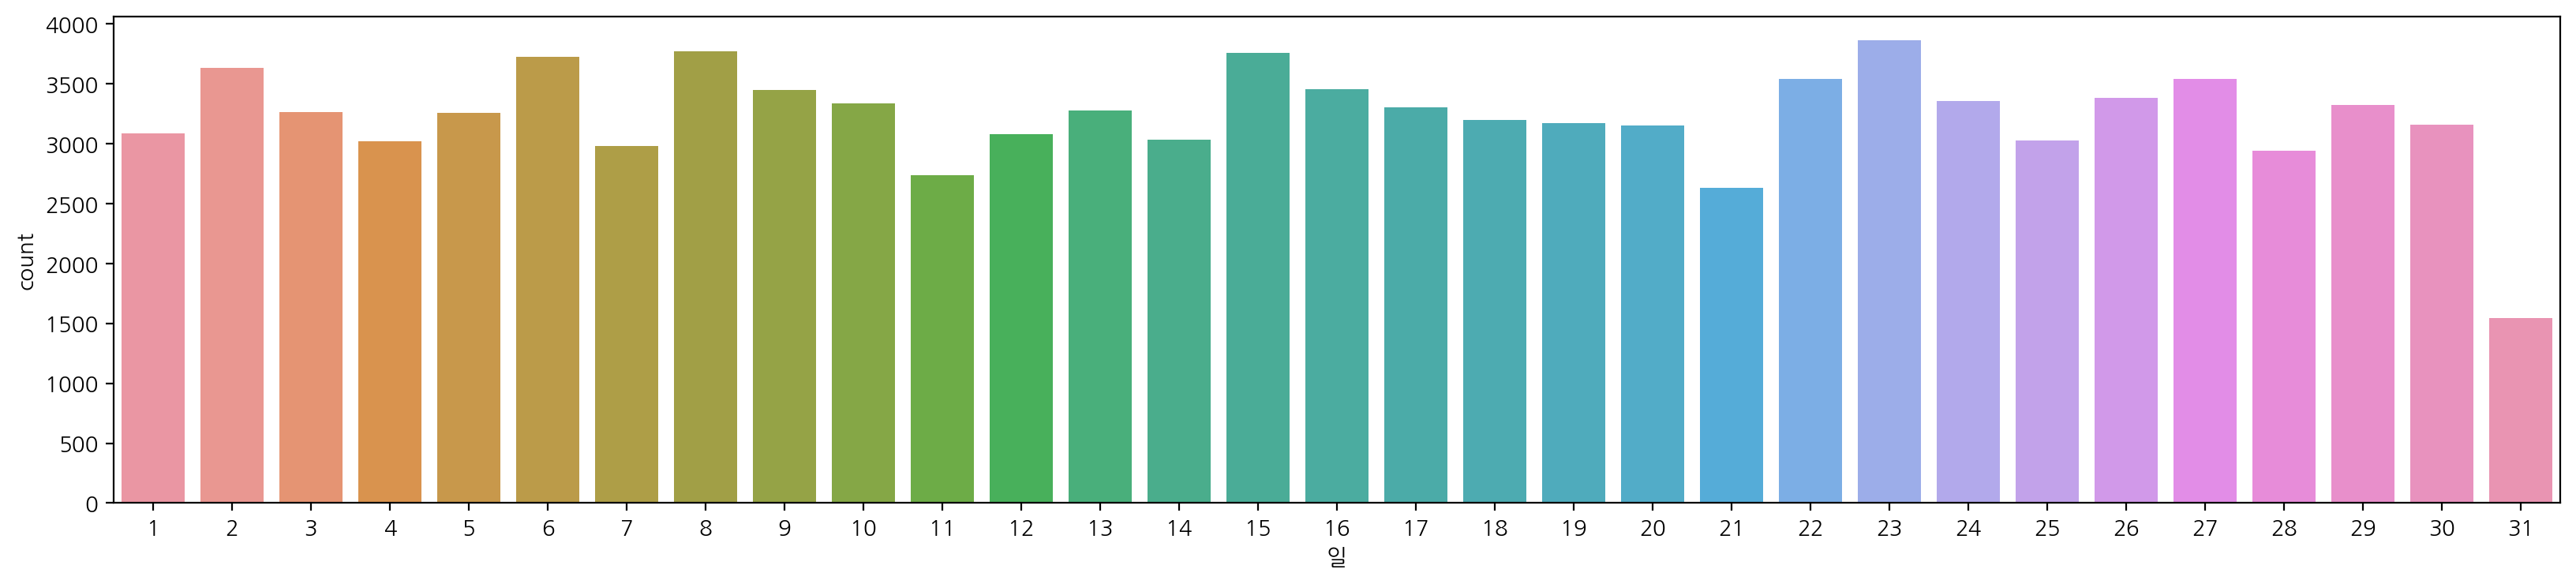

In [ ]:
# 일별 처방횟수를 시각화합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df_drug, x="일")

* 31일의 데이터가 다른 날짜에 비해 유난히 적은 것을 확인할 수 있습니다.
* 이유가 무엇일까요?

### 요일별 처방수

<Axes: xlabel='영문요일', ylabel='count'>

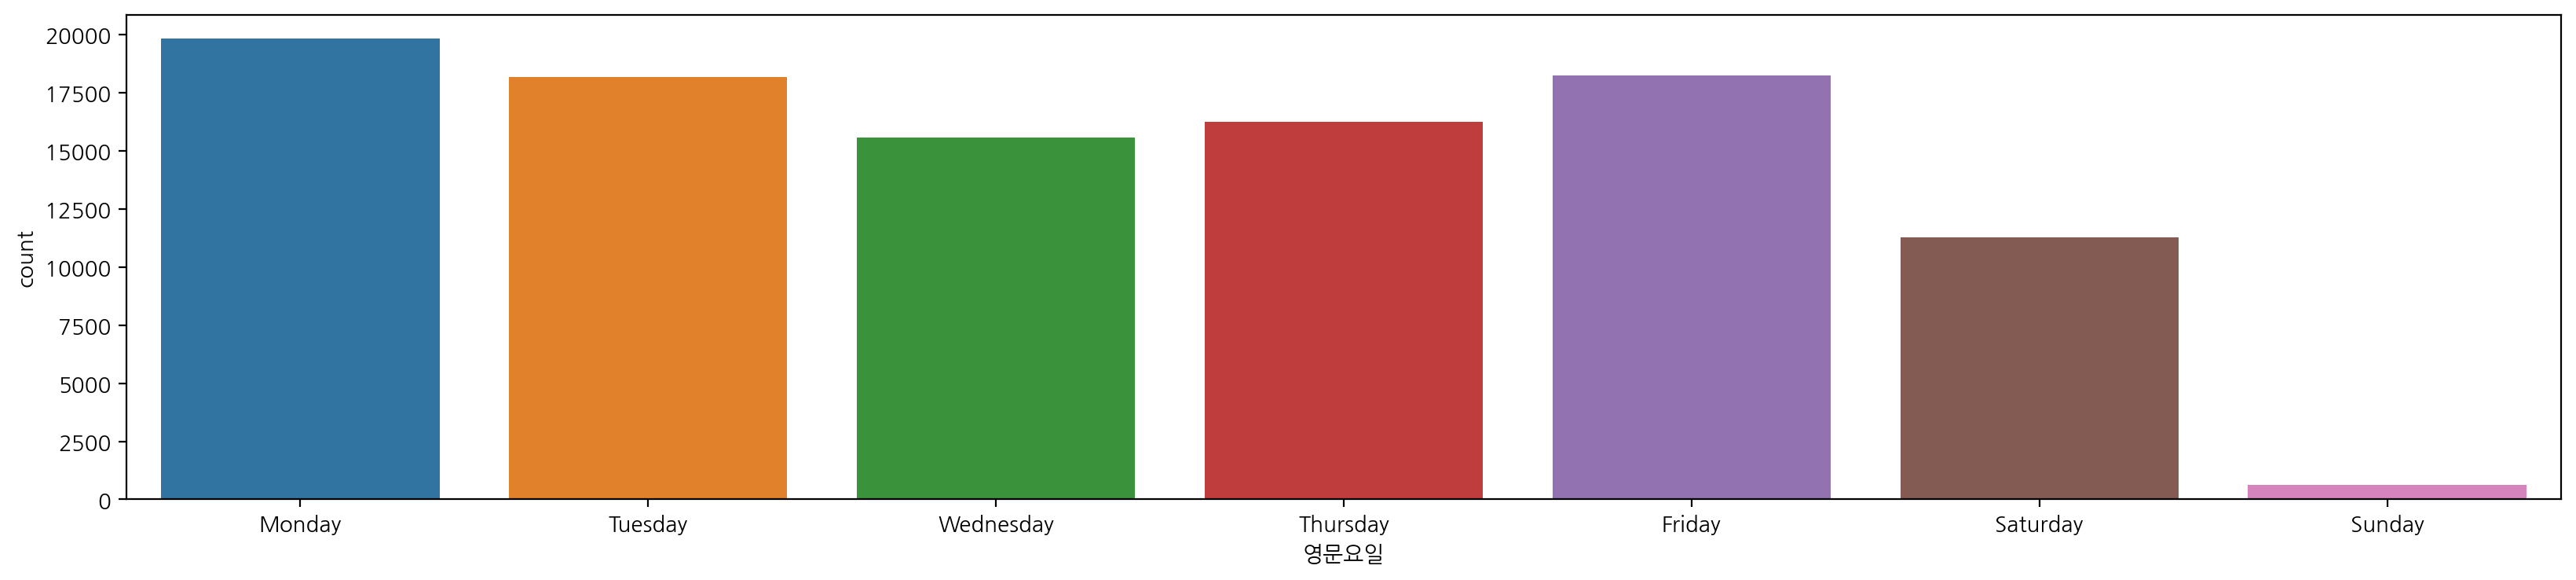

In [ ]:
# 요일별 처방횟수를 시각화합니다.
# 단, 월요일부터 일요일까지 순서대로 출력되어야 합니다.
# sort_values : 값을 기준으로 레이블을 정렬해주는 함수

plt.figure(figsize=(20, 4))
sns.countplot(x="영문요일", data=df_drug.sort_values("요일"))

* 월요일이 가장 많고, 일요일이 가장 적습니다.
* 평일 중에서는 월요일과 금요일이 가장 많고 화, 목, 수 순서로 많습니다.

## 연령대별 처방수

<Axes: xlabel='연령대', ylabel='count'>

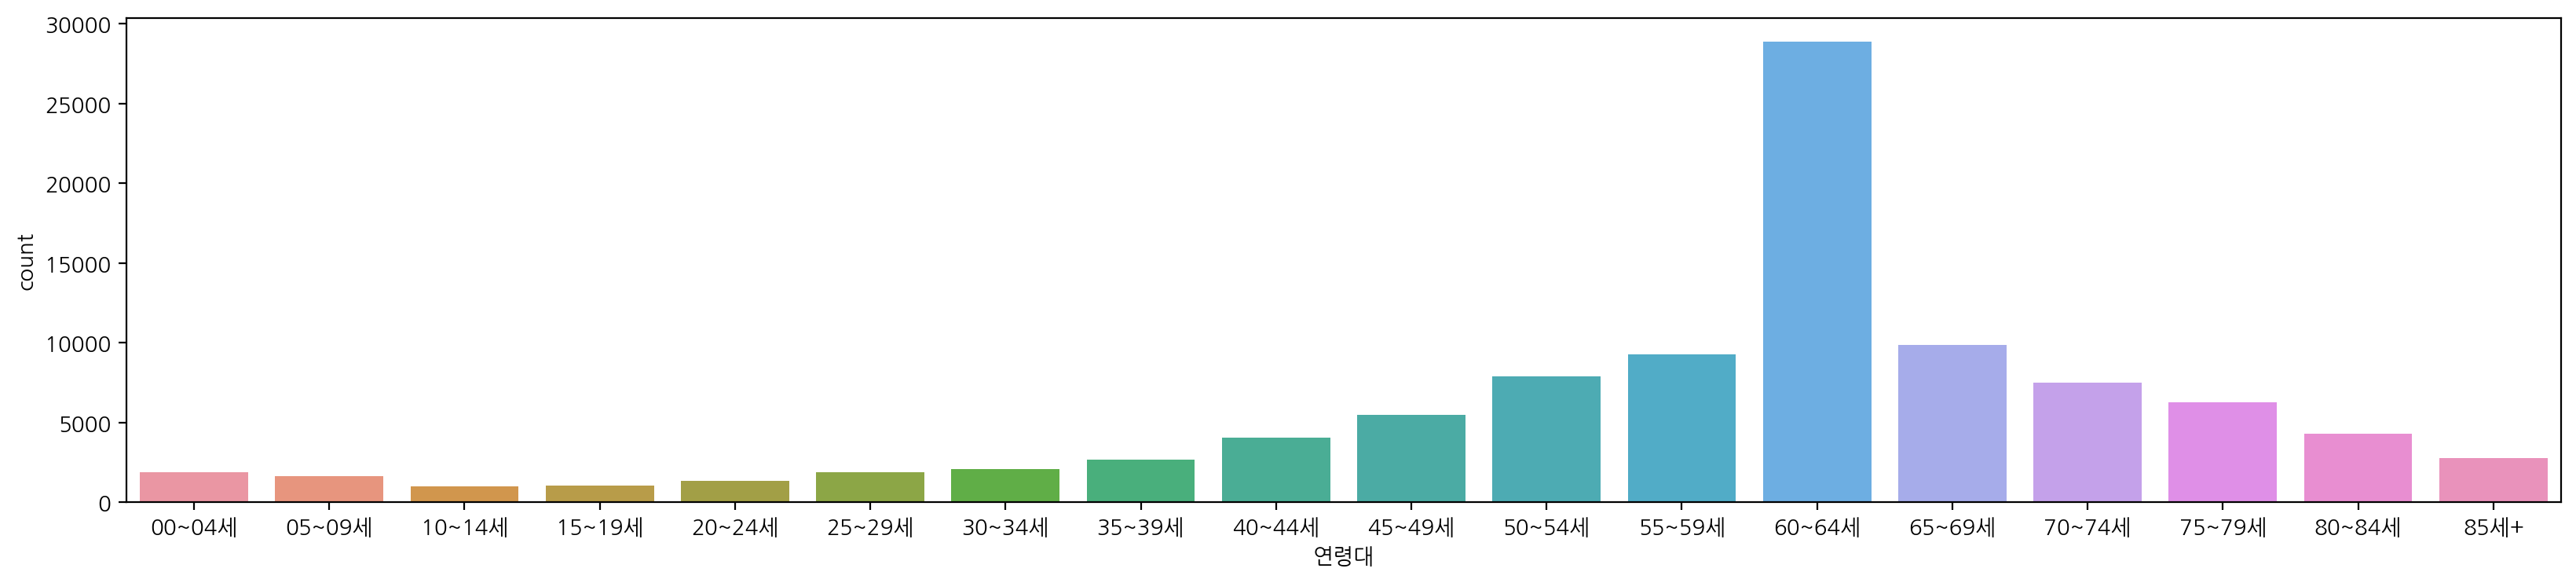

In [ ]:
# 연령대별 처방횟수를 시각화합니다.
# 단, 저연령대부터 고연령대까지 순서대로 출력되어야 합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df_drug.sort_values('연령대'), x="연령대")

### 연령대-성별 처방수

<Axes: xlabel='연령대', ylabel='count'>

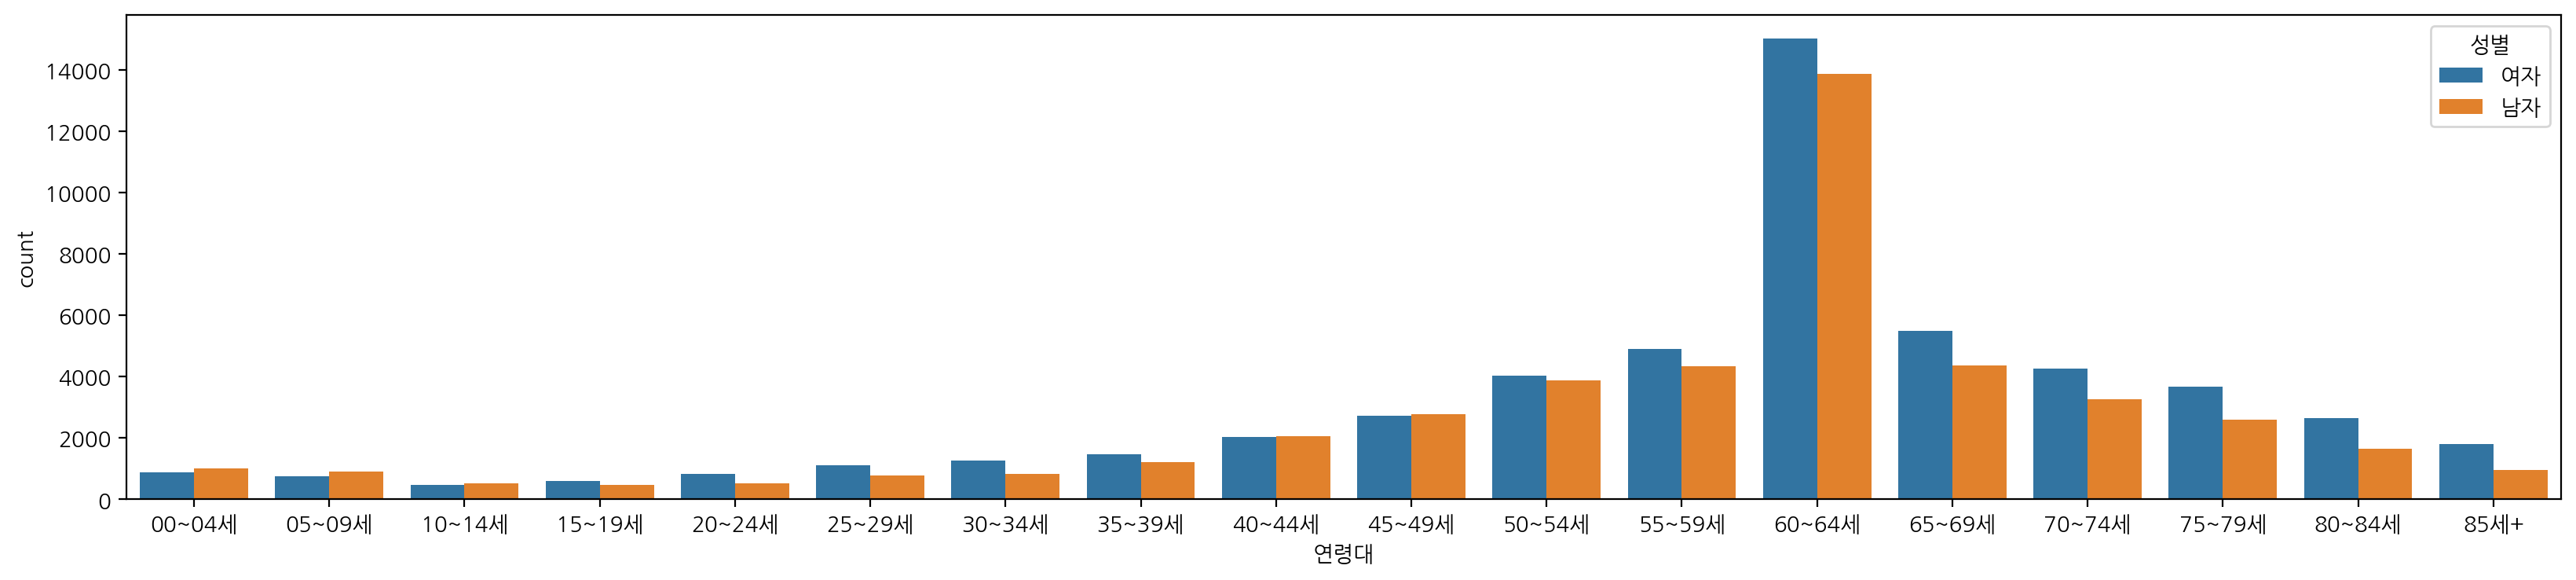

In [ ]:
# 연령별 처방횟수를 순서대로 출력하되 성별을 기준으로 나누어 출력합니다.
plt.figure(figsize=(20, 4))
sns.countplot(x="연령대", hue="성별", data=df_drug.sort_values('연령대'))

* 데이터상 중장년층 여성의 데이터가 부각되어 보입니다.
* 그렇다면 중장년층 여성이 다른 그룹에 비해 건강이 취약한 것일까요?
* 이것에 대해서 생각해 봅시다.

## 그룹별 분석
### pandas groupby
* <img src = 'https://pandas.pydata.org/docs/_images/06_groupby.svg' width="800">
* pandas에서는 DataFrame을 변수의 값에 따라 그룹별로 나눠 분석할 수 있도록 groupby() 메서드를 지원하고 있습니다.
* groupby()를 이용하여 데이터를 나눠 분석해보겠습니다.

<Axes: xlabel='연령대'>

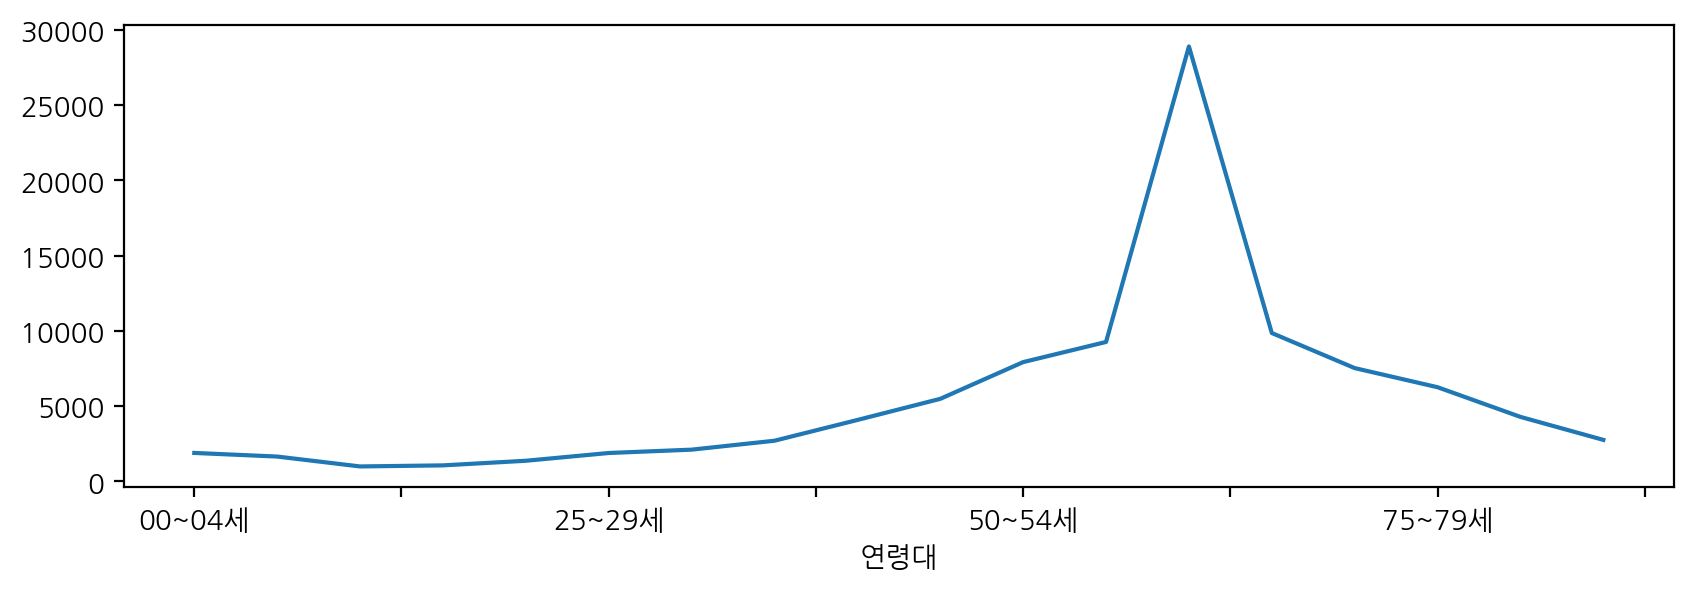

In [ ]:
df.groupby("연령대")["1회 투약량"].count().plot(figsize=(10,3))

* <pandas.core.groupby.generic.DataFrameGroupBy object ... > 문구가 보입니다.
* groupby 메서드로 생성된 결과물은 DataFrameGroupBy object로 DataFrame과는 다릅니다.
* DataFrameGroupBy object에는 여러 메서드를 적용할 수 있습니다.
* groupby() 메서드 뒤에 다른 메서드를 바로 붙여서 사용할 수 있는 것입니다.
* 이렇게 여러 메서드를 붙여 사용하는 것을 **메서드 체이닝**이라고 합니다.

<Axes: xlabel='연령대'>

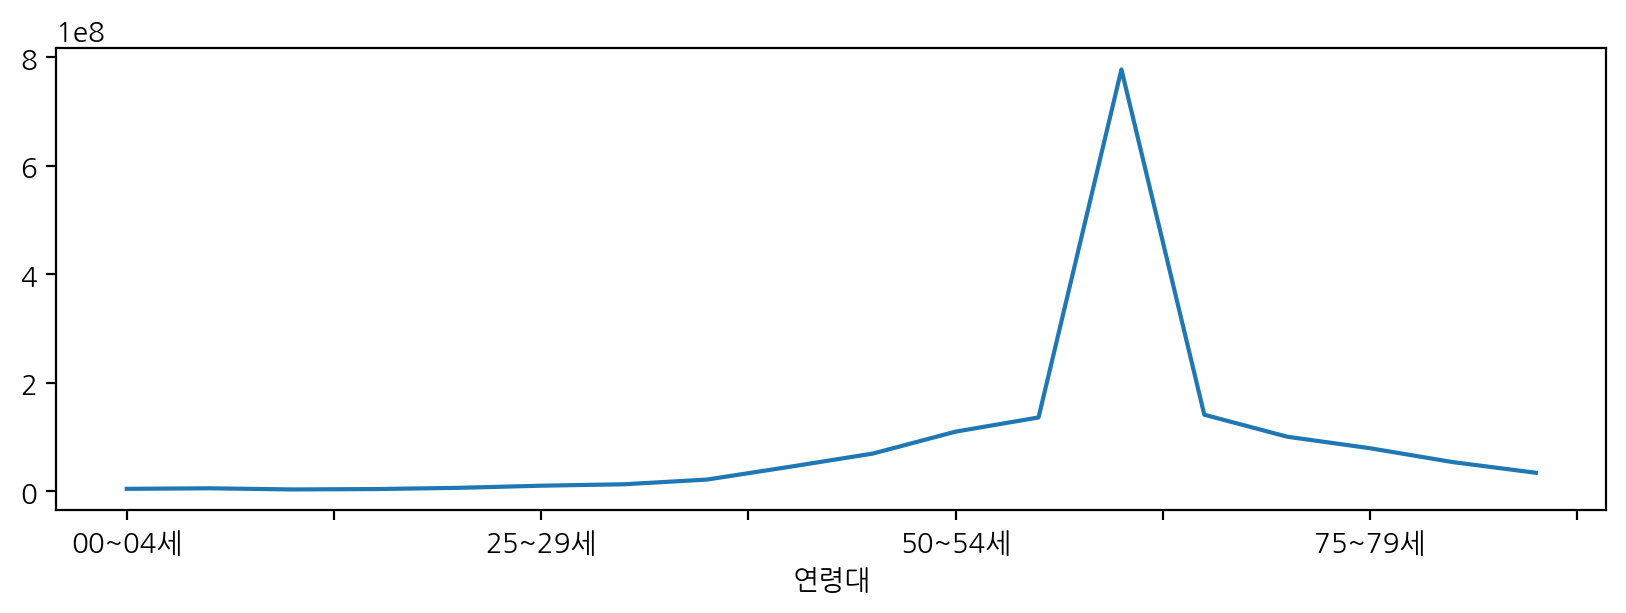

In [ ]:
# df를 연령대로 나눈 다음, 금액의 합을 출력하겠습니다.
df.groupby(by="연령대")["금액"].sum().plot(figsize=(10,3))

<Axes: xlabel='연령대'>

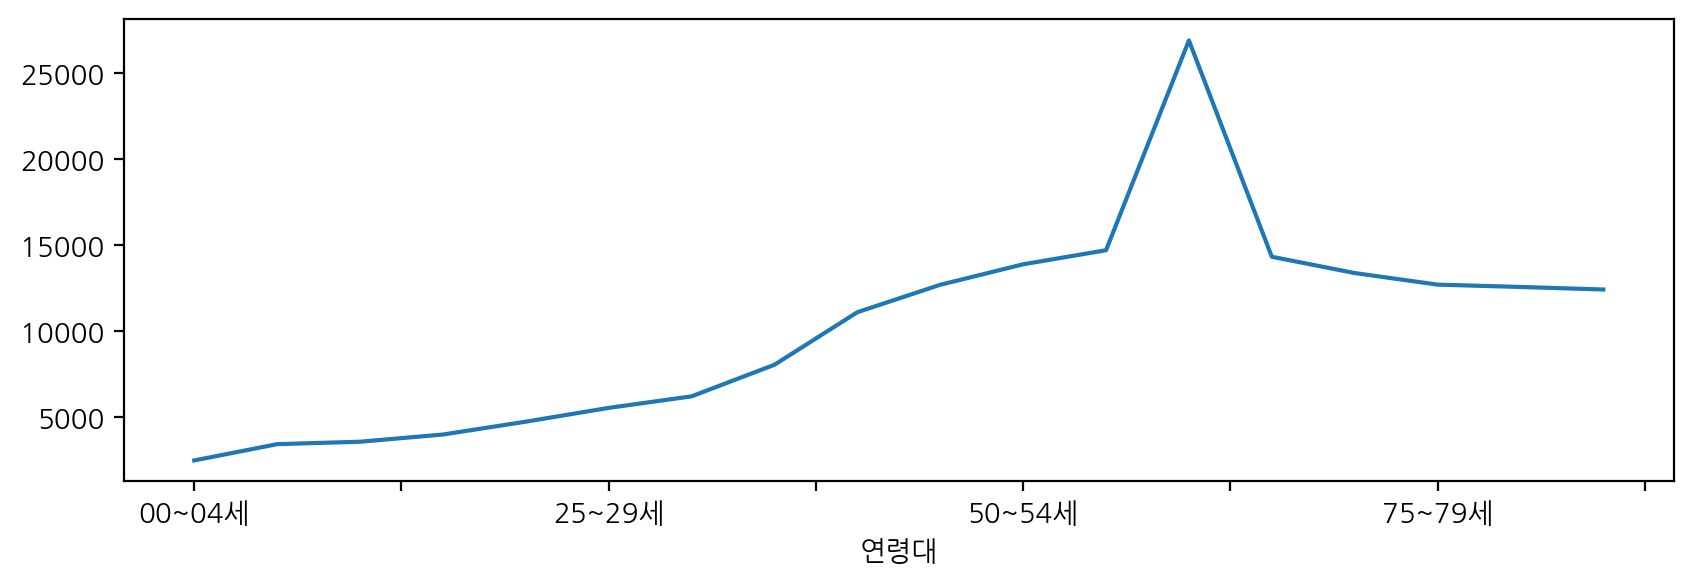

In [ ]:
# df를 연령대로 나눈 다음, 금액의 평균을 출력하겠습니다.
df.groupby(by="연령대")["금액"].mean().plot(figsize=(10,3))

### 투여경로

<Axes: xlabel='투여경로명', ylabel='count'>

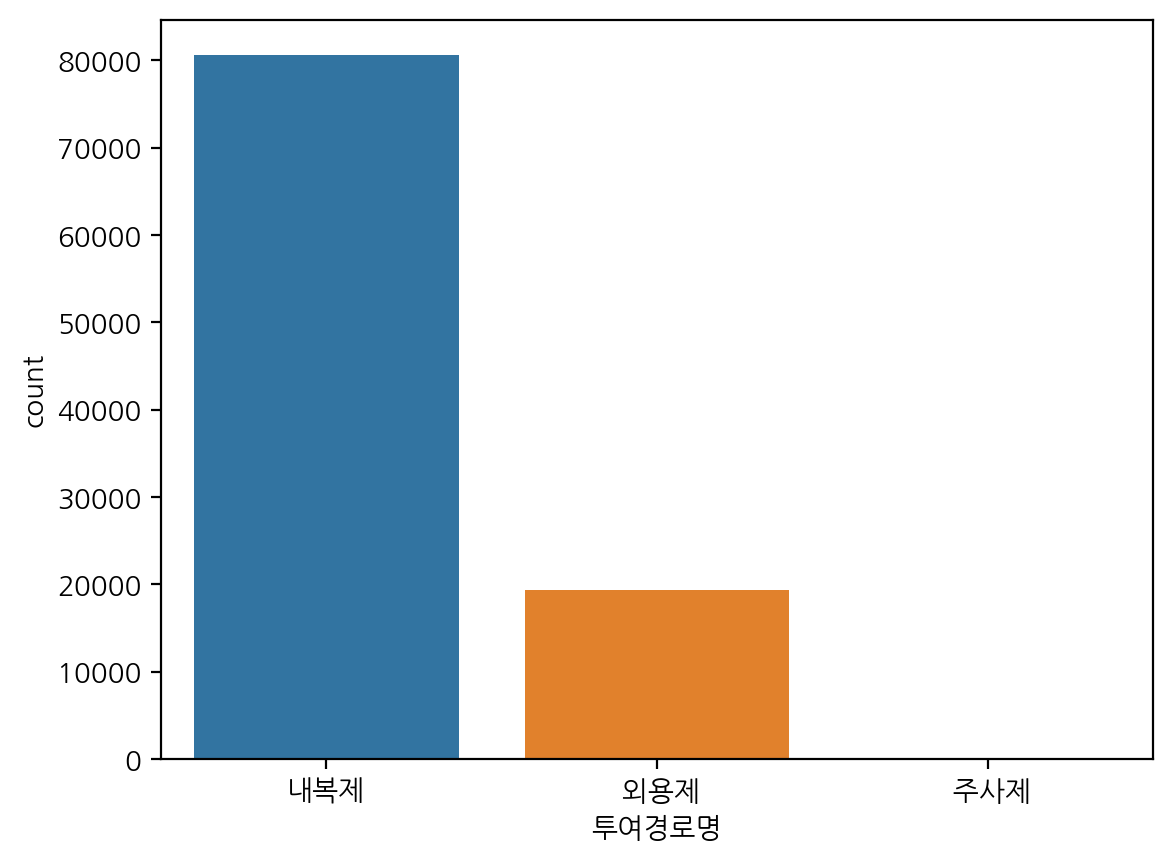

In [ ]:
# "투여경로"별 빈도수를 시각화를 합니다.
sns.countplot(x="투여경로명", data=df_drug)

In [ ]:
df_drug[df_drug["투여경로명"] == "주사제"].nlargest(10, "금액")

,성별,가입자 일련번호,처방내역 일련번호,일련번호,연령대코드(5세단위),요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총 투여일수,...,월,일,요일,영문요일,연령대,투여경로,제형,투여경로명,제형코드,제형명칭


### 단가

<Axes: title={'center': '단가'}, xlabel='투여경로명', ylabel='단가'>

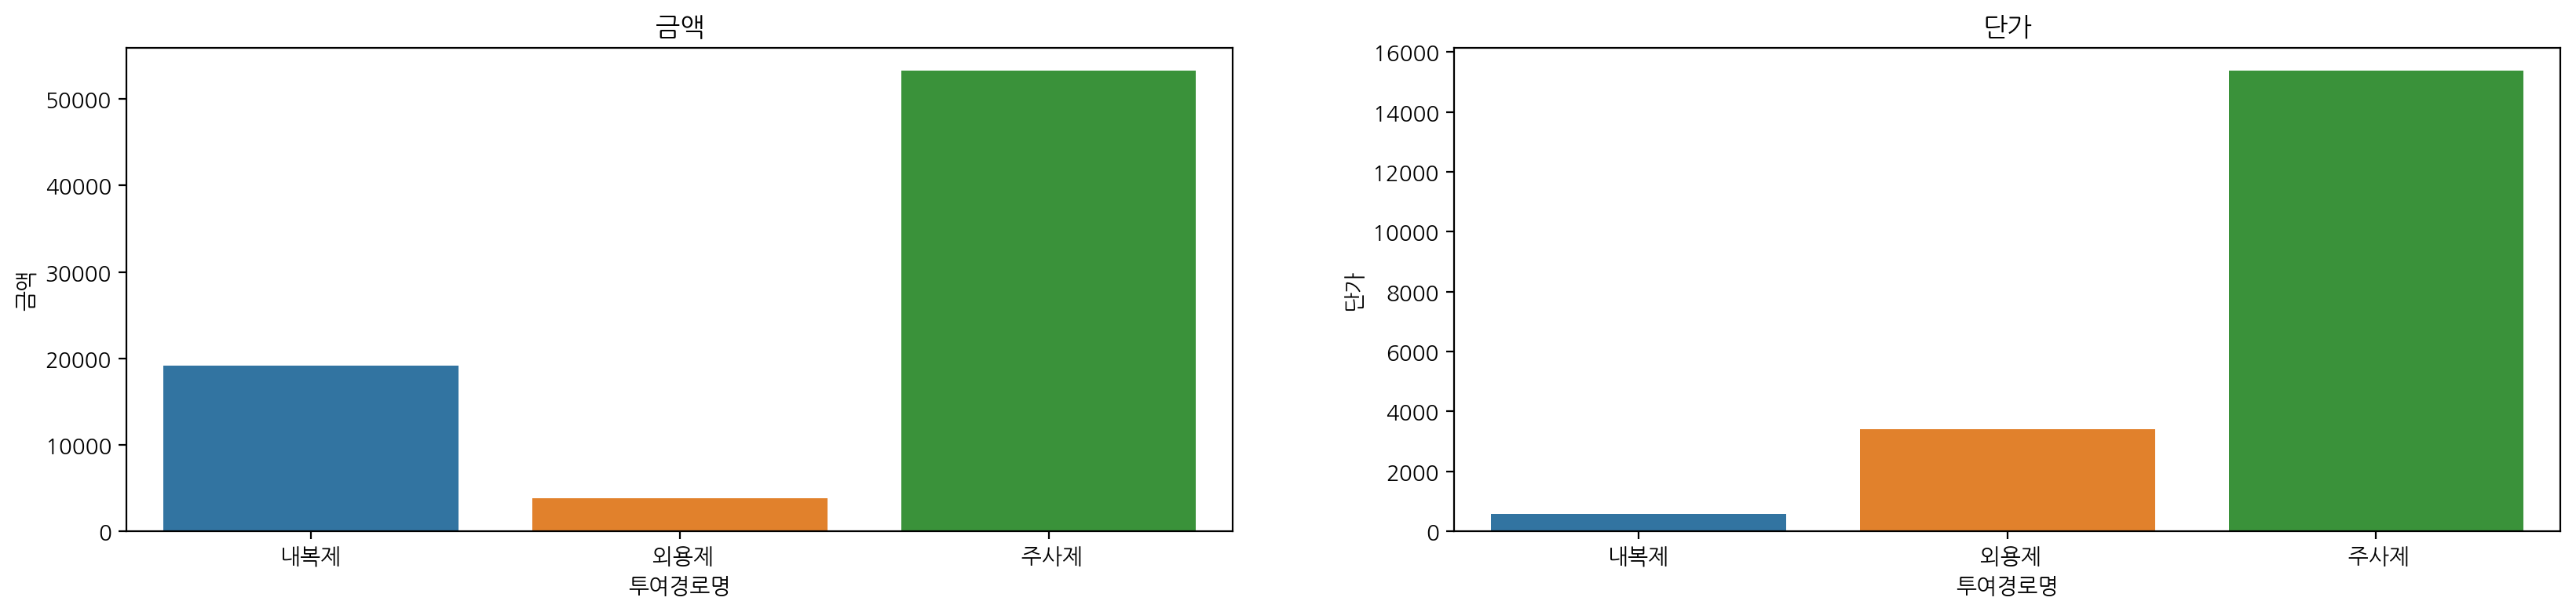

In [ ]:
# 투여경로별 평균 단가와 금액을 비교합니다.
plt.figure(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title("금액")
sns.barplot(data=df_drug, x="투여경로명", y="금액", errorbar=None)
plt.subplot(1,2,2)
plt.title("단가")
sns.barplot(data=df_drug,x="투여경로명", y="단가", errorbar=None)


### 총투여일수

<Axes: xlabel='투여경로명', ylabel='총 투여일수'>

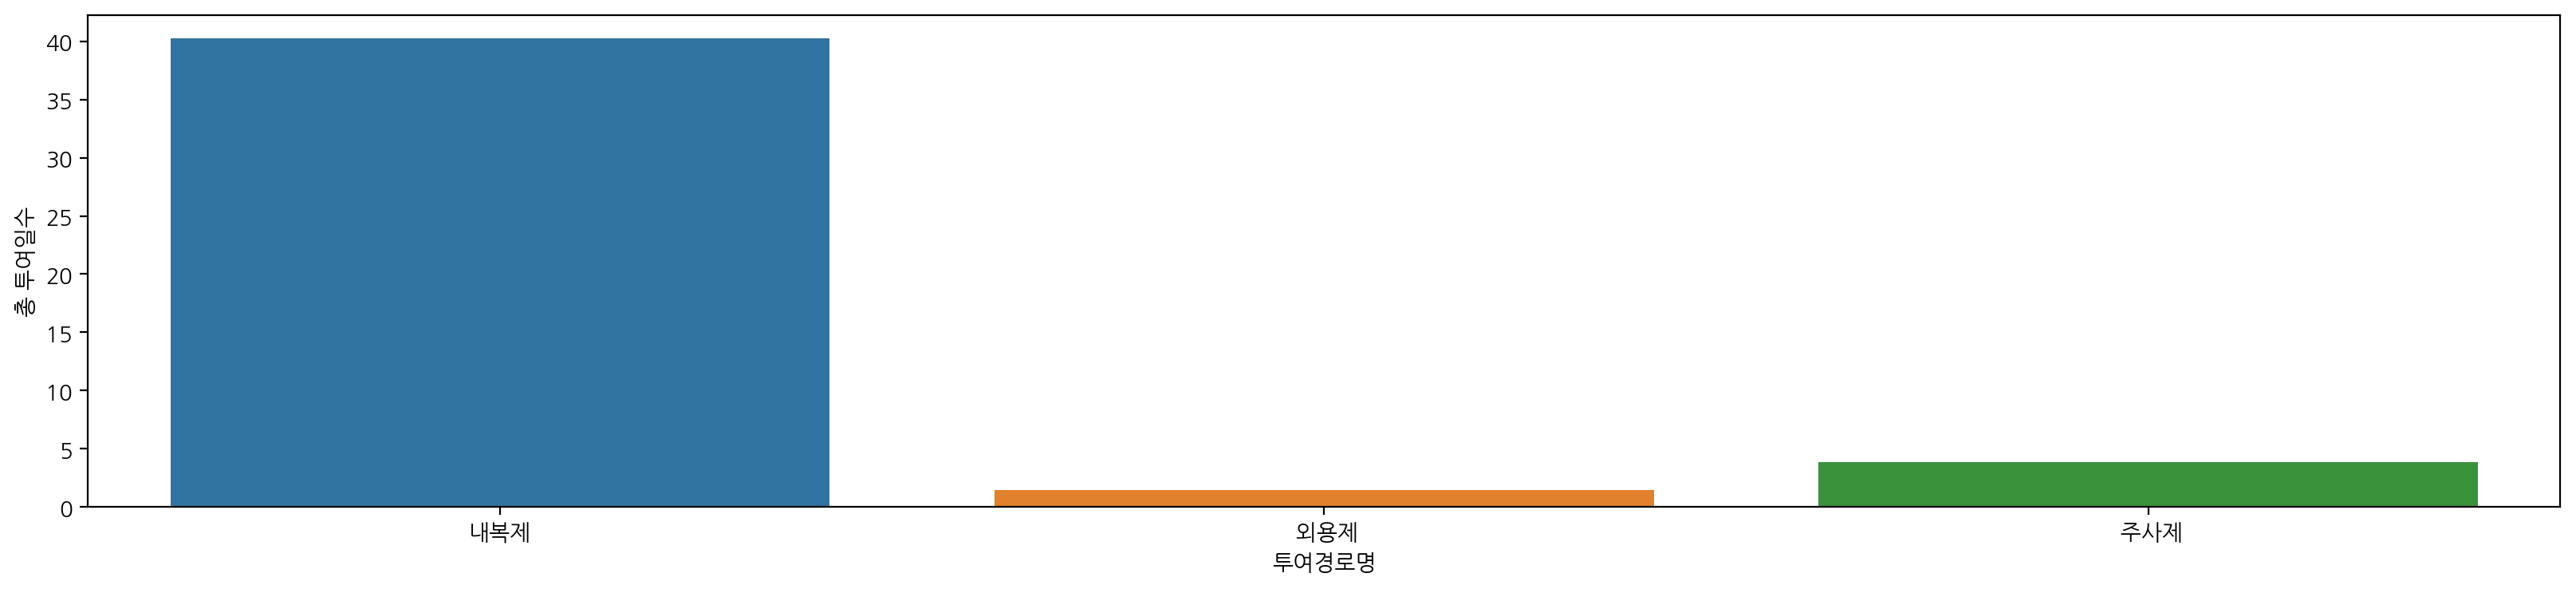

In [ ]:
# 투여경로별 평균 총투여일수를 확인합니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_drug, x="투여경로명", y="총 투여일수", errorbar=None)

### 연령대별, 투여경로

<Axes: xlabel='연령대', ylabel='총 투여일수'>

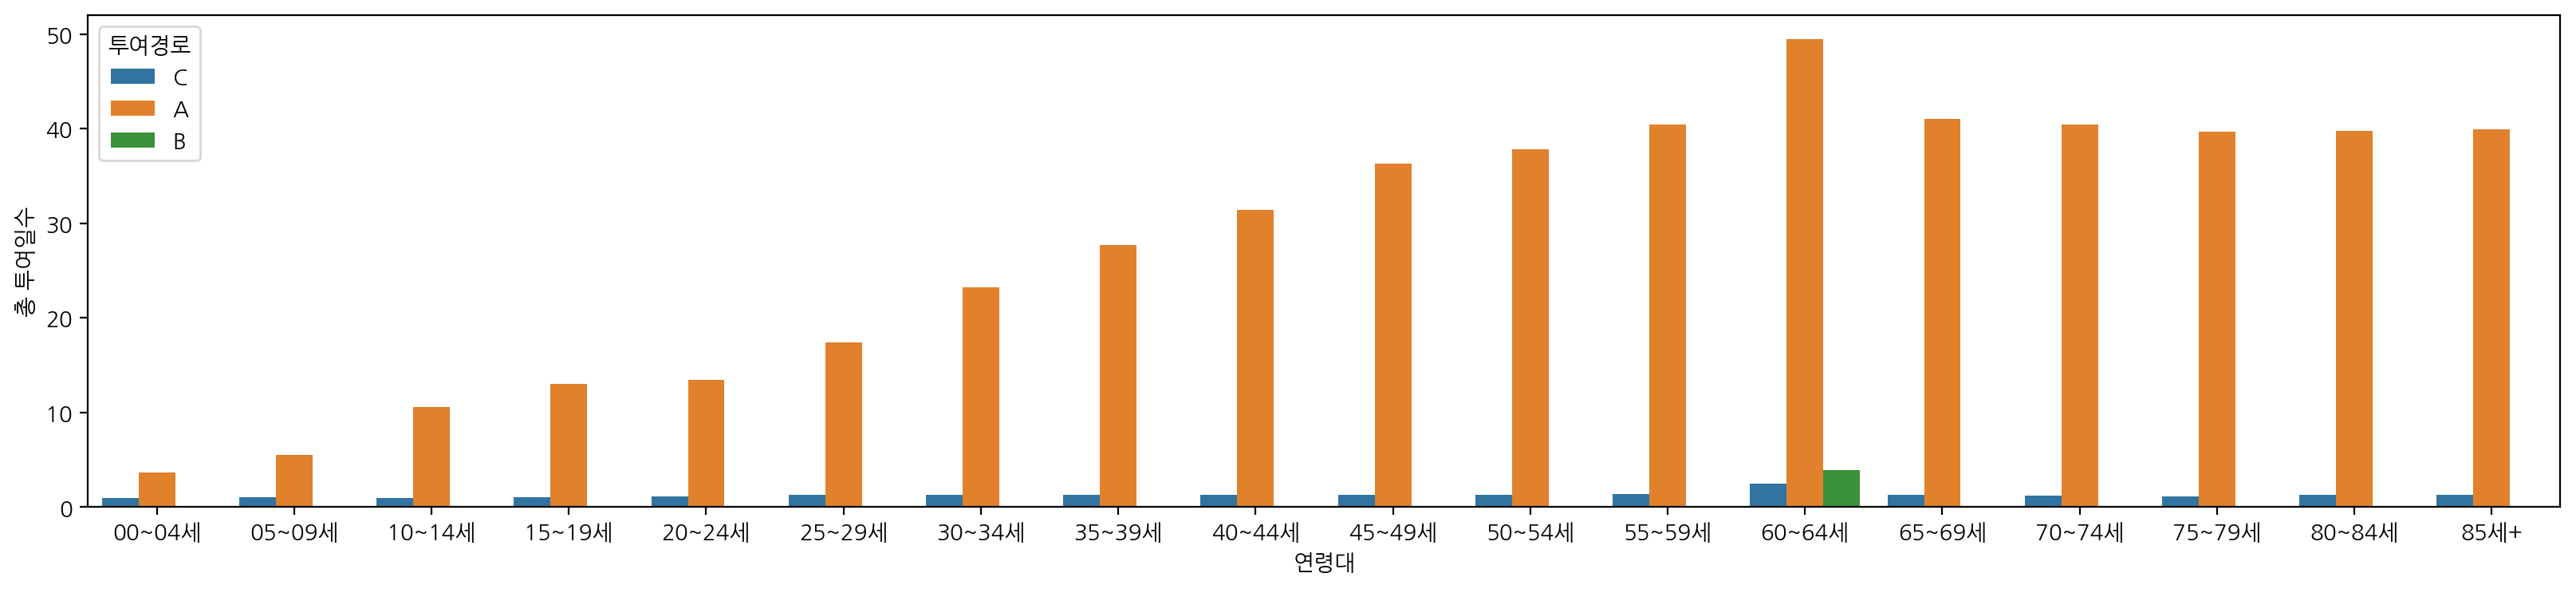

In [ ]:
# 연령대에 대해 투여경로의 약 처방 횟수를 막대 그래프로 나타내겠습니다.
plt.figure(figsize=(20, 4))
sns.barplot(x="연령대", y="총 투여일수", hue="투여경로", data=df_drug.sort_values("연령대"), errorbar=None)